#Importing librarys#


In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Importing Data and some info#


In [18]:
creditcard=pd.read_csv('creditcard.csv')
print(creditcard.head())
print(creditcard.shape)
print(creditcard.describe())
print(creditcard.info())

#using some tools to take idea for data

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

#Handilg Missing Vaues if Found#

In [19]:
missing_values = creditcard.isnull().sum()
missing_values[missing_values > 0]

,0
V13,1
V14,1
V15,1
V16,1
V17,1
V18,1
V19,1
V20,1
V21,1
V22,1


In [20]:
Continuous_Columns = [
  'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
           'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
           'V24', 'V25', 'V26', 'V27', 'V28']
Carde_imputed = SimpleImputer(missing_values=np.nan, strategy="mean")

creditcard[Continuous_Columns]= Carde_imputed.fit_transform(creditcard[Continuous_Columns])
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39697,39927,-1.466679,2.425732,0.877724,3.950765,0.762477,1.162748,0.575625,-0.288354,-1.357990,...,0.186051,0.571010,-0.107517,-0.754306,-0.752828,0.113179,-2.079421,-0.809173,1.50,0.0
39698,39927,-0.523165,-0.100021,0.892966,-1.900405,-0.156870,-0.783894,0.917683,-0.308345,-1.305284,...,-0.082504,-0.414677,-0.063392,-0.087455,-0.303383,-0.682889,-0.178417,-0.137169,100.92,0.0
39699,39928,-2.768425,-1.007072,2.151127,0.117797,1.283178,1.869731,-0.562240,0.820374,0.348797,...,-0.182963,0.778210,0.904077,-1.288631,0.212441,0.483975,-0.027614,-0.582813,11.99,0.0
39700,39928,1.201327,0.158614,-0.325263,0.471667,0.086446,-0.770357,0.422151,-0.205277,-0.451865,...,0.027664,-0.018485,-0.199382,0.053605,0.683829,0.428416,-0.077342,-0.006394,45.00,0.0


In [21]:
missing_values = creditcard.isnull().sum()
missing_values[missing_values > 0]

,0
Amount,1
Class,1


#Classes Info#

In [22]:
class_counts= creditcard['Class'].value_counts()
print(class_counts)

Class
0.0    39597
1.0      104
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Transaction Classes')

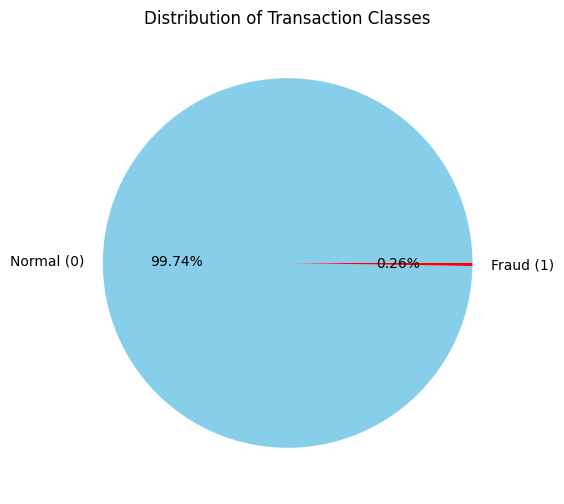

In [23]:
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=['Normal (0)', 'Fraud (1)'], autopct='%1.2f%%', colors=['skyblue', 'red'])
plt.title('Distribution of Transaction Classes')

In [24]:
# from counting the classes we can show the data has two classes the data is not balance we support this with pie plot

#Ploting pefore and after scaling#



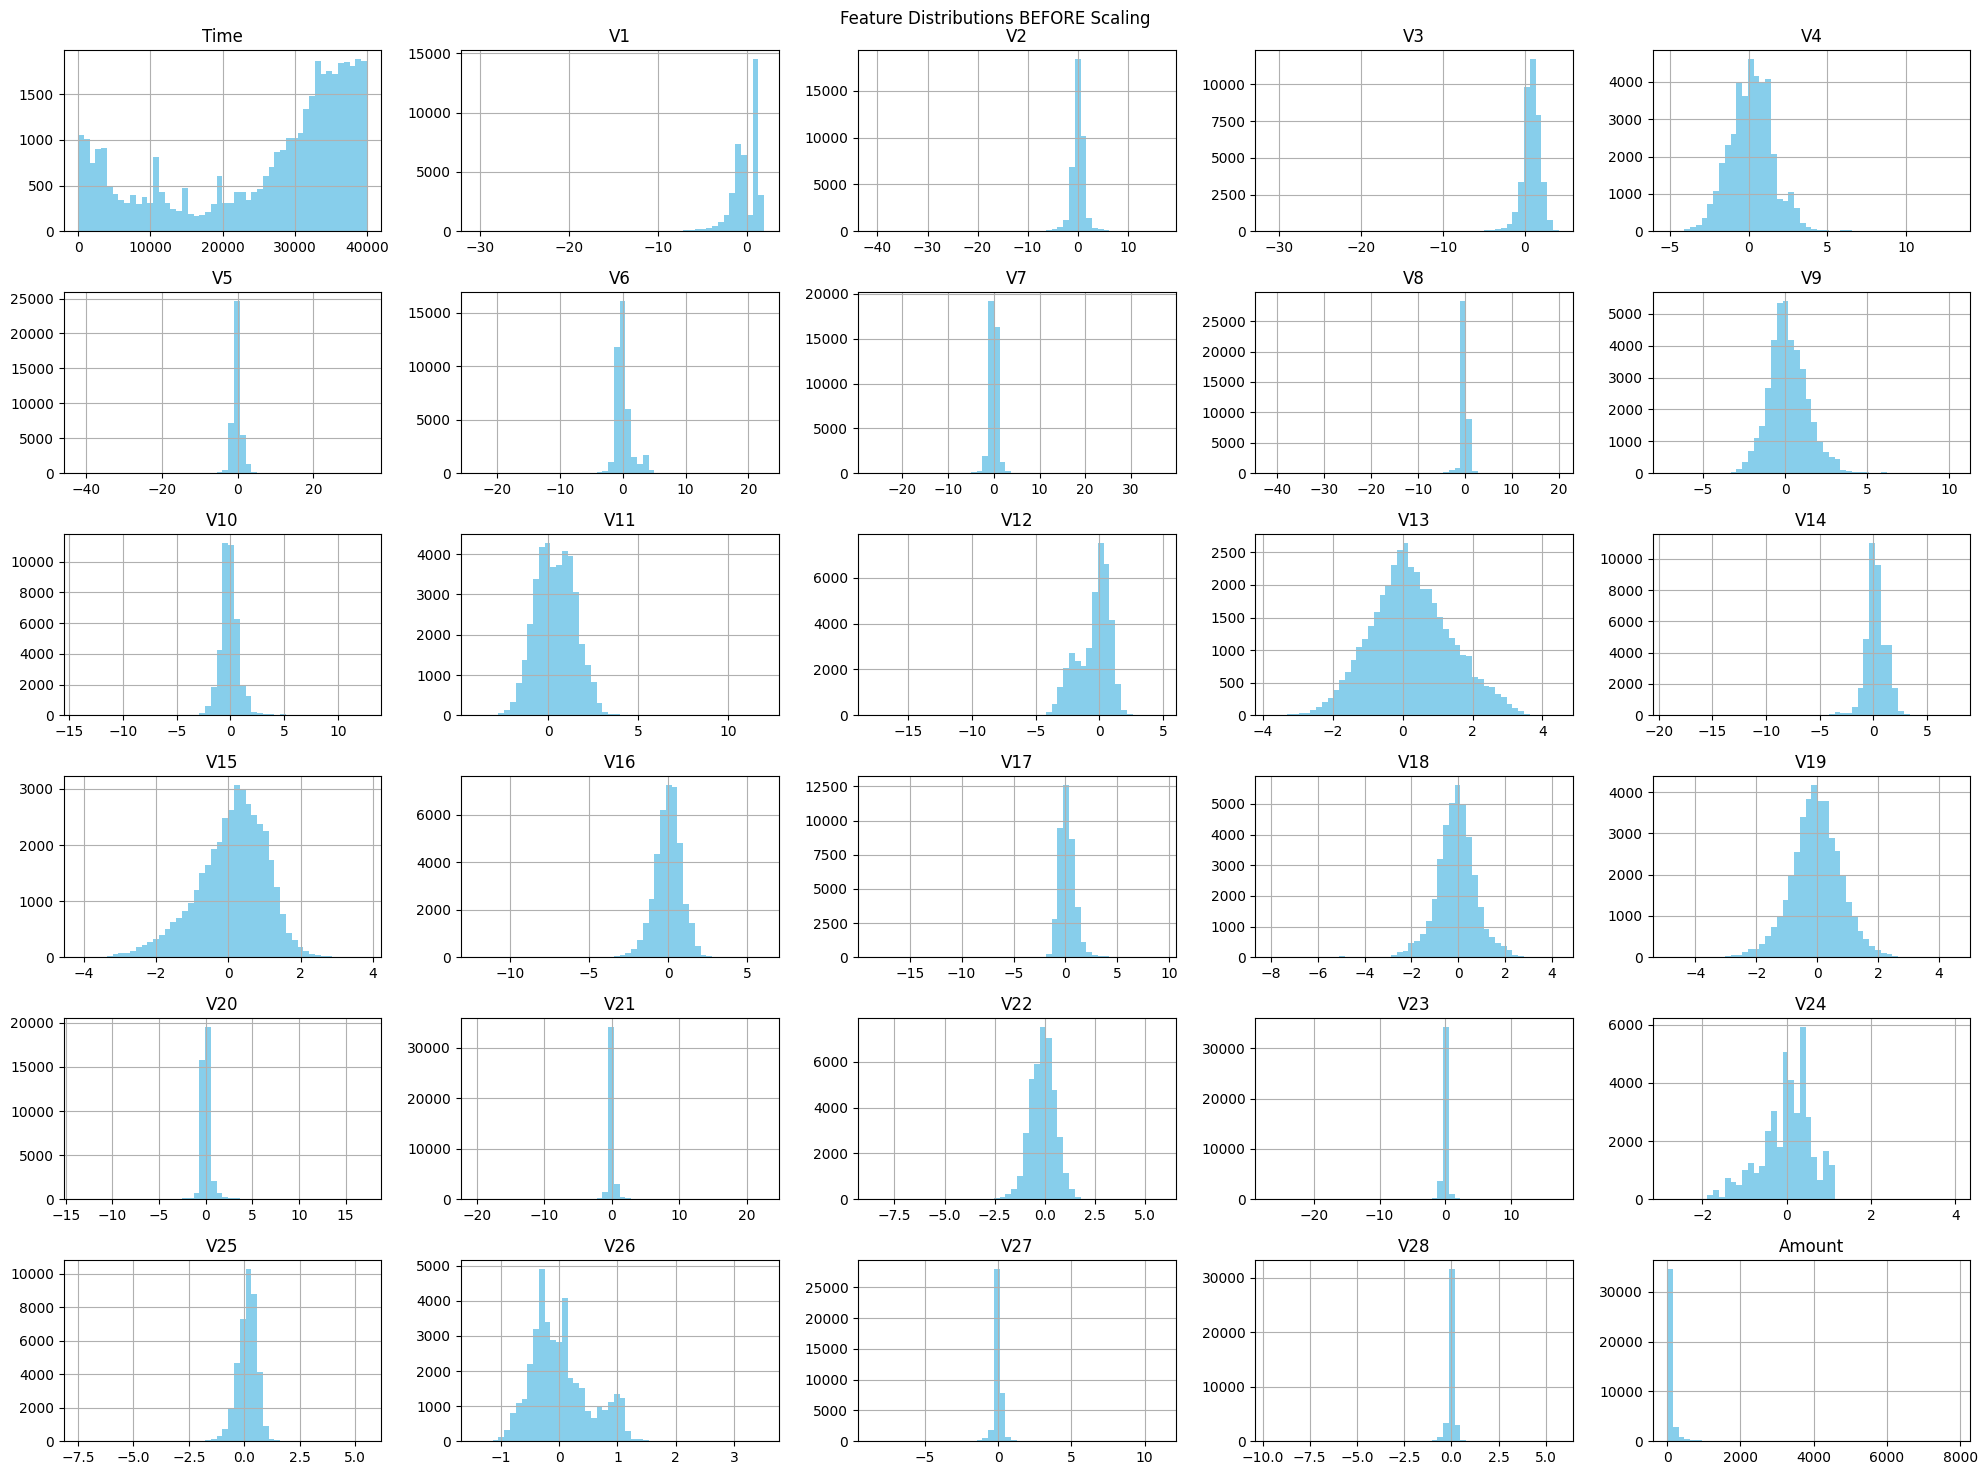

In [25]:
features = [col for col in creditcard.columns if col != 'Class']
creditcard[features].hist(bins=50, figsize=(20,15), color='skyblue')
plt.suptitle("Feature Distributions BEFORE Scaling")
plt.tight_layout()

#plot to show data befor scaling

In [26]:
Carde = creditcard.drop(columns=['Class'])
scaler = StandardScaler()
Carde_scaled = scaler.fit_transform(Carde)

#we drop column of class because if apply scaling on class the class it will be ruined
#we apply scale to all data without class we chose StandardScaler not MinMaxScaler  becuas
#It gives more accurate results in PCA and K-Means.
#It scales all features to the same variance scale, without distorting the distribution.

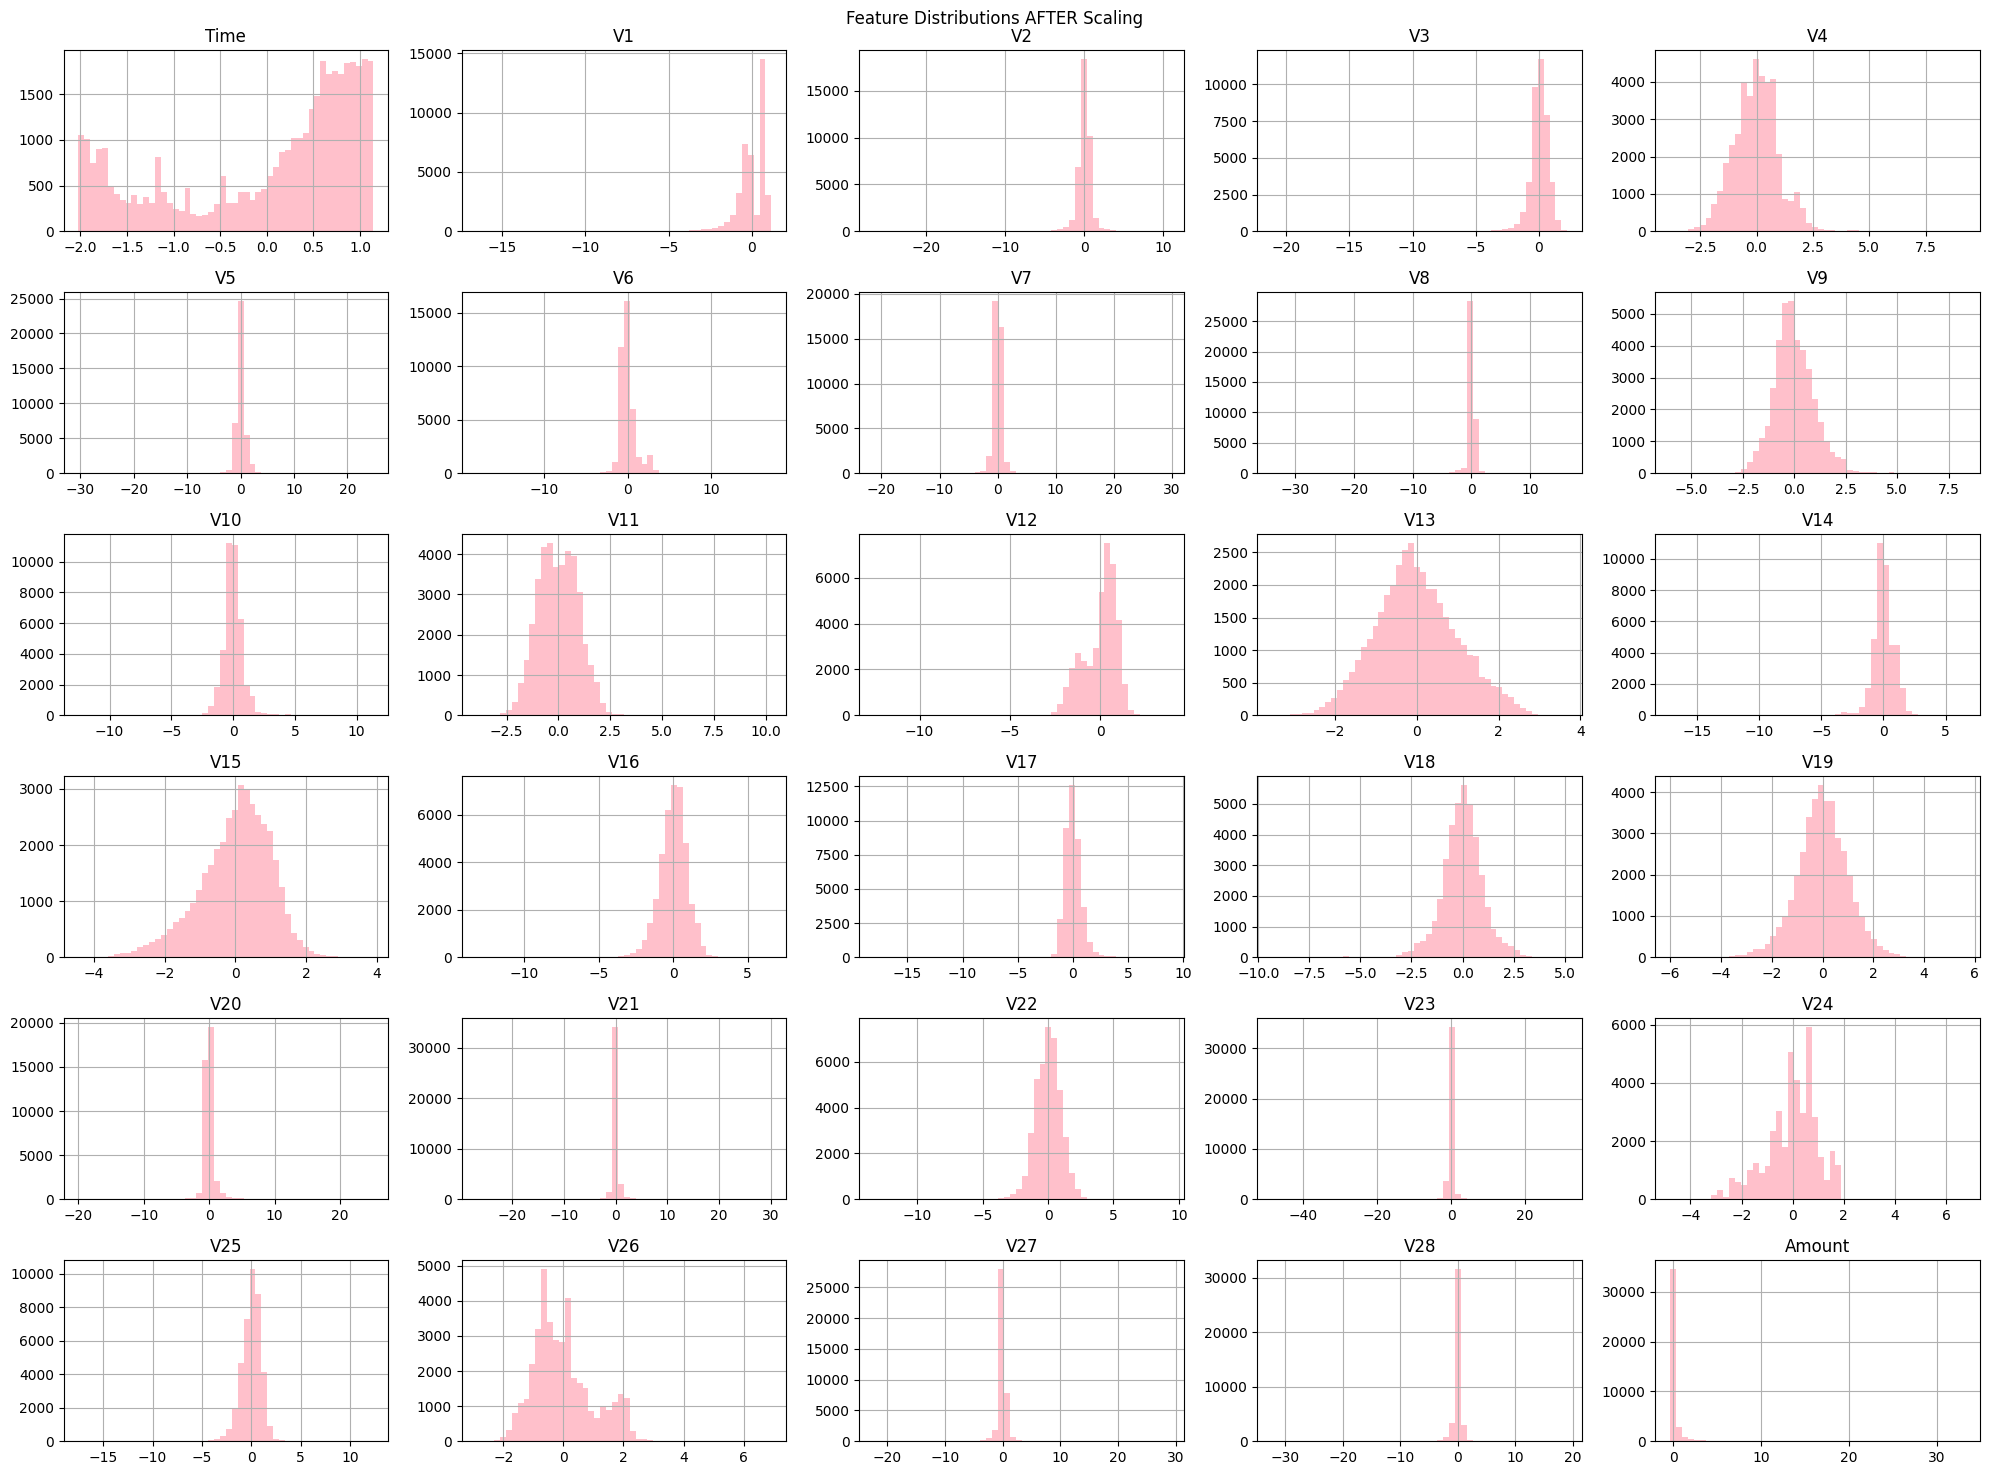

In [27]:
Carde_scaled_df = pd.DataFrame(Carde_scaled, columns=Carde.columns)
Carde_scaled_df.hist(bins=50, figsize=(20,15), color='pink')
plt.suptitle("Feature Distributions AFTER Scaling")
plt.tight_layout()

#plot to show data after scaling

In [28]:
pca = PCA()
Card_pca = pca.fit_transform(creditcard[Continuous_Columns])
Card_pca.shape

(39702, 24)

Component 1: Explained Variance = 0.1316, Cumulative = 0.1316
Component 2: Explained Variance = 0.1153, Cumulative = 0.2469
Component 3: Explained Variance = 0.0797, Cumulative = 0.3266
Component 4: Explained Variance = 0.0761, Cumulative = 0.4027
Component 5: Explained Variance = 0.0645, Cumulative = 0.4672
Component 6: Explained Variance = 0.0583, Cumulative = 0.5255
Component 7: Explained Variance = 0.0552, Cumulative = 0.5808
Component 8: Explained Variance = 0.0496, Cumulative = 0.6303
Component 9: Explained Variance = 0.0483, Cumulative = 0.6786
Component 10: Explained Variance = 0.0428, Cumulative = 0.7214
Component 11: Explained Variance = 0.0359, Cumulative = 0.7572
Component 12: Explained Variance = 0.0350, Cumulative = 0.7922
Component 13: Explained Variance = 0.0306, Cumulative = 0.8229
Component 14: Explained Variance = 0.0296, Cumulative = 0.8525
Component 15: Explained Variance = 0.0284, Cumulative = 0.8808
Component 16: Explained Variance = 0.0254, Cumulative = 0.9063
C

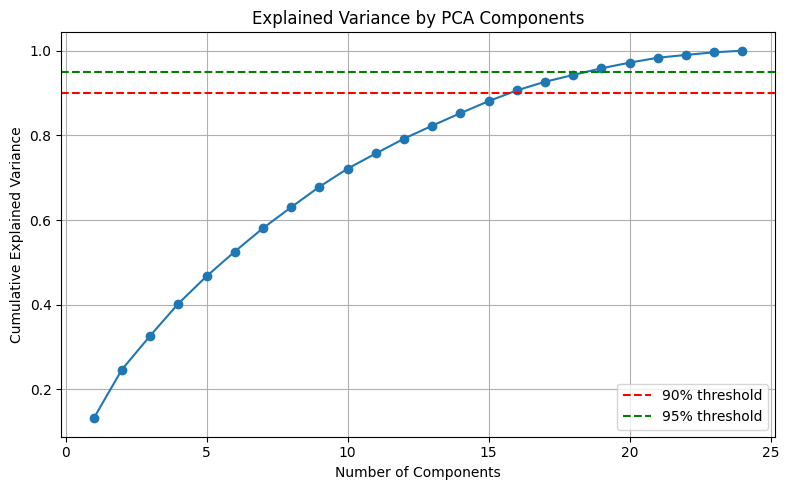

In [29]:
explained_var_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_var_ratio)

for i, (ev, cv) in enumerate(zip(explained_var_ratio, cumulative_variance), start=1):
    print(f"Component {i}: Explained Variance = {ev:.4f}, Cumulative = {cv:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f" 90% variance: {n_components_90}")
print(f" 95% variance: {n_components_95}")


 90% variance: 16
 95% variance: 19


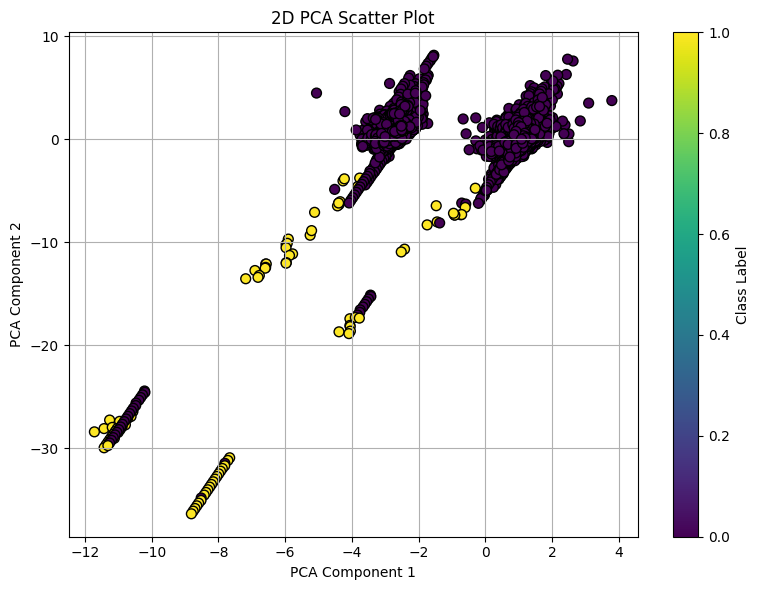

In [31]:
X_pca_2d = pca.transform(creditcard[Continuous_Columns])[:, :2]

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=creditcard['Class'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Scatter Plot')
plt.grid(True)
plt.colorbar(label='Class Label')
plt.tight_layout()
plt.show()

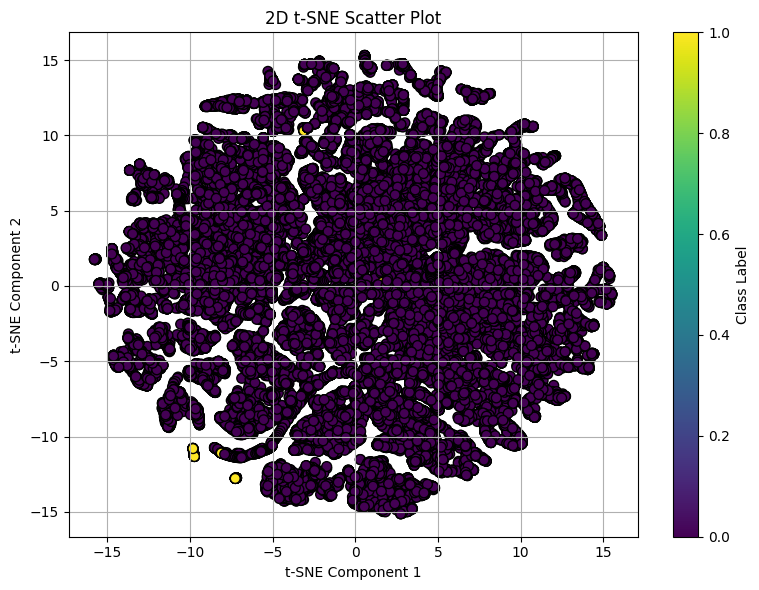

In [34]:
tsne = TSNE(n_components=2, perplexity=10, max_iter=300, random_state=42)
Card_tsne_2d = tsne.fit_transform(creditcard[Continuous_Columns])
plt.figure(figsize=(8, 6))
plt.scatter(Card_tsne_2d[:, 0], Card_tsne_2d[:, 1], c=creditcard['Class'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D t-SNE Scatter Plot')
plt.grid(True)
plt.colorbar(label='Class Label')
plt.tight_layout()
plt.show()
# Applied t-SNE to reduce high-dimensional data to 2D for visualizing potential clusters based on transaction class

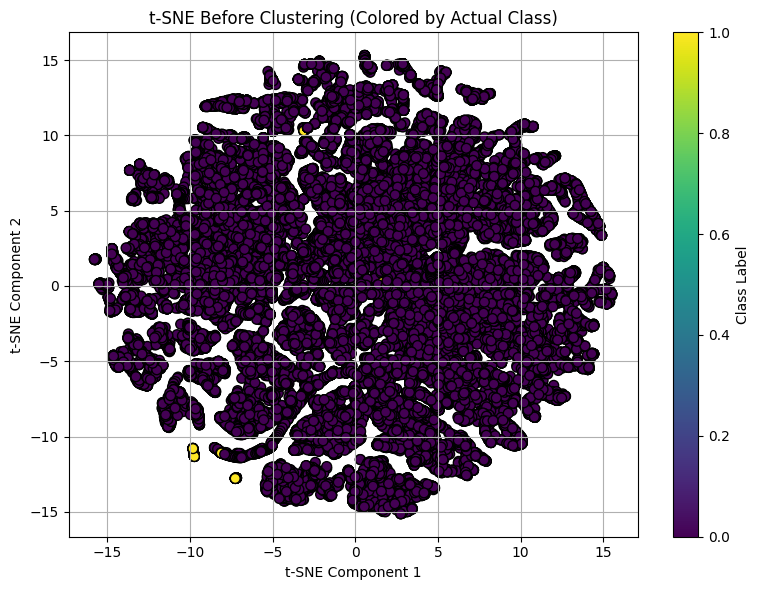

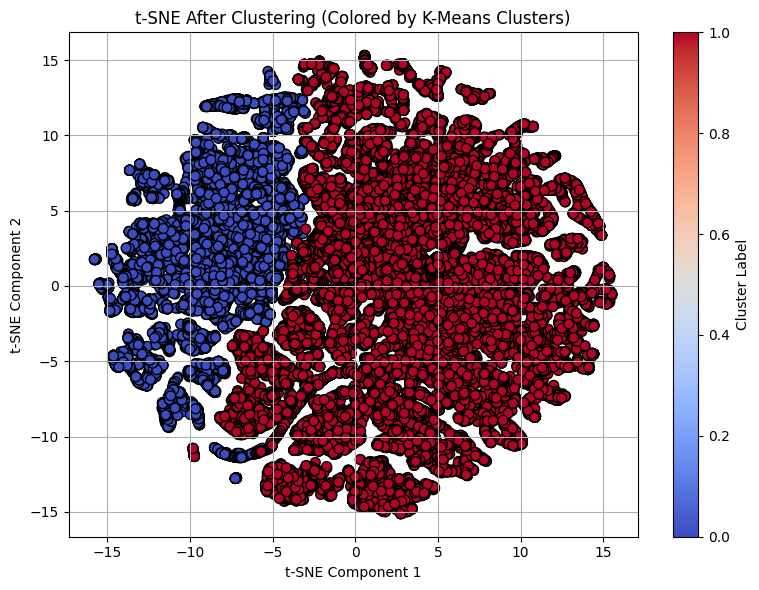

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(Card_tsne_2d[:, 0], Card_tsne_2d[:, 1], c=creditcard['Class'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Before Clustering (Colored by Actual Class)')
plt.grid(True)
plt.colorbar(label='Class Label')
plt.tight_layout()
plt.show()
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(creditcard[Continuous_Columns])
plt.figure(figsize=(8, 6))
plt.scatter(Card_tsne_2d[:, 0], Card_tsne_2d[:, 1], c=clusters, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE After Clustering (Colored by K-Means Clusters)')
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.tight_layout()
plt.show()
# Created 2D t-SNE plots before and after applying K-Means clustering to visualize how transactions are grouped


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

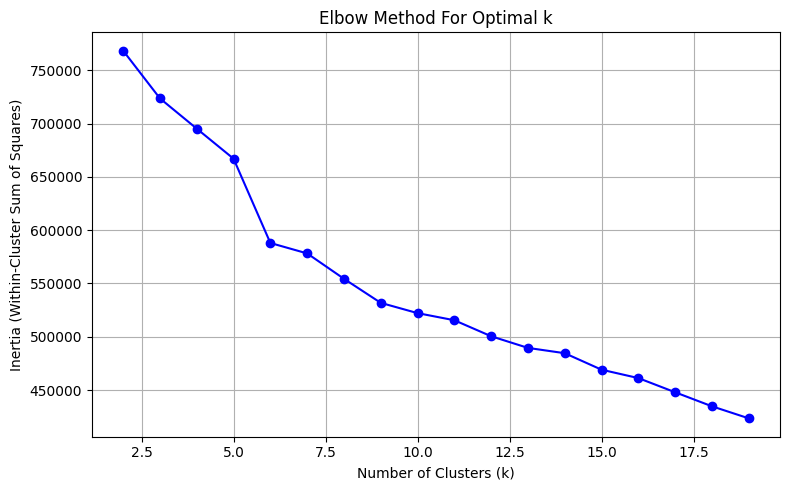

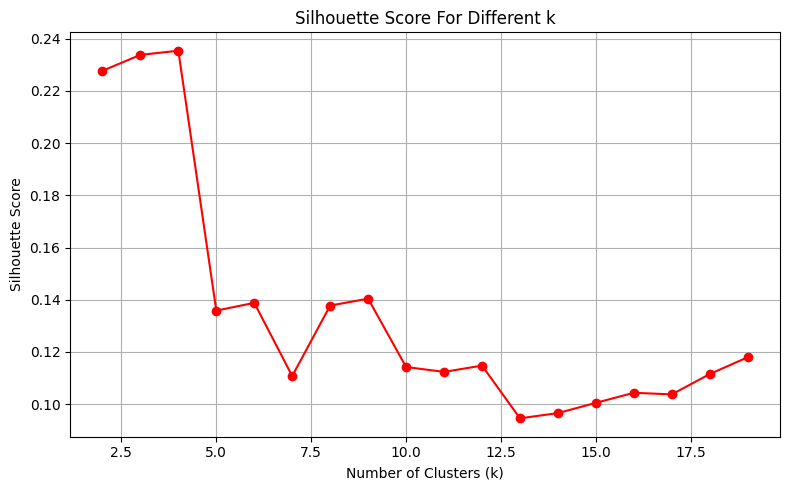

In [39]:
inertia = []
silhouette_scores = []
k_values = range(2, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(creditcard[Continuous_Columns])

    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(creditcard[Continuous_Columns], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Different k')
plt.grid(True)
plt.tight_layout()
plt.show()
# Performed K-Means clustering with different values of k (from 2 to 10) to evaluate clustering performance.
# Used the Elbow method by plotting the inertia (within-cluster sum of squares) to find the point where adding more clusters no longer significantly improves the model.
# Also computed the Silhouette score for each k to assess how well-separated the clusters are.
# These two methods together help identify the most appropriate number of clusters that balances compactness and separation.
